__信息量：__ 随机变量取某个值时，其概率倒数的对数就是信息量。表达了从未知到已知所需信息的含量。公式如下  
$ I_{i}=\log _{2}\left ( \frac{1}{p_{i}} \right )= -\log_{2}p_{i} $  
其中底数可以是2，单位是比特，底数也可以是其他，单位也相应不同，一般其中的log 都是以2为底的。

信息熵：信息量的期望。公式如下：
$ H(x)=\sum_{i=1}^{n} p_{i} * \log _{2}\left ( \frac{1}{p_{i}} \right ) $  

信息论通过定义一种定量的学习方法**“熵”**（entropy）来比较任意两个随机变量的信息价值。

连续变量的熵定义：  
$ H(x)=\int_{x}^{} p(x) * \log \frac{1}{p(x)} dx = - \int_{x} p(x) \log p(x) dx $   

离散变量的熵定义：  
$ H(x)=\sum_{i=1}^{n} p_{i} * \log _{2}\left ( \frac{1}{p_{i}} \right ) = - \sum_{i=1}^{n} p_{i} \log P_{i} $  

#### 如何理解用信息熵来表示最短的平均编码长度?
最短的平均编码长度 = 信源的不确定程度 / 传输的表达能力。

其中信源的不确定程度，用信源的熵来表示，又称之为被表达者，传输的表达能力，称之为表达者表达能力，如果传输时有两种可能，那表达能力就是$ log_{2}2=1$，如果是传输时有三种可能，那表达能力就是$ log_{2}3$。以例子来描述，尽量做到通俗易懂。

最短的平均编码长度（也就是我们猜的次数，称重的次数），是由随机变量的熵，除以，表达能力的，得到！

### 交叉熵
假设 p 和 q 是关于样本集的两个分布，其中 p 是样本集的真实分布，q 是样本集的估计分布，那么按照真实分布 p 来衡量识别一个样本所需要编码长度的期望（即，平均编码长度）：  
$ H(p)=\sum_{i}^{n}p_{i}log\frac{1}{p_{i}}=\sum_{i}^{n}-p_{i}logp_{i} $  

如果用估计分布来表示真实分布的平均编码长度，应为：  
$ H(p,q)=\sum_{i}^{n}p_{i}log\frac{1}{q_{i}}=\sum_{i}^{n}-p_{i}logq_{i}$

这是因为 q 用来编码的样本来自于真是分布 p，所以期望值H(p,q)中的概率是$p_{i}$。而H(p,q)就是交叉熵。



在神经网络后面添加Softmax，真实的标签（或者是类别）就相当于真实的分布，经过Softmax得出的值就是预测的结果，因此可以使用交叉熵函数来作为损失函数。有了交叉熵的概念，我们就可以得出softmax的损失函数  
#### Softmax的损失函数：  
$ L=\sum -y_{i}\ln \hat{y_{i}} $  
  其中$y_{i}$是第i个类别的真实值，值的范围是0 or 1; $\hat{y_{i}}$是神经元的输出作为预测值；在Softmax中我们取以e为底的对数，因为都是e的指数形式，可以方便计算.

#### softmax函数定义 
softmax用于多分类过程中，它将多个神经元的输出结果归一化，映射到(0,1)区间内，得出的结果就是每一类的分类概率，从而进行多分类！   
softmax计算公式，假设我们有一个数组，V，Vi表示V中的第i个元素，那么这个元素的softmax值为：   

$ S_{i}=\frac{e^{i}}{\sum_{j}e^{j}} $  
或者：$ p_{i}=\frac{e^{Z_{i}}}{\sum_{j=1}^ke^{z_{j}}} $  
 分子$e^{z_{i}} $是要计算的类别 i 的网络输出的指数；分母是所有类别网络输出的指数和，共k个类别。这样就得到了类别i的输出概率 $p_{i}$ 。
   
对于softmax定义比较简单，当我们在应用多分类的时候一般来说找概率最大的那一个值即可。 
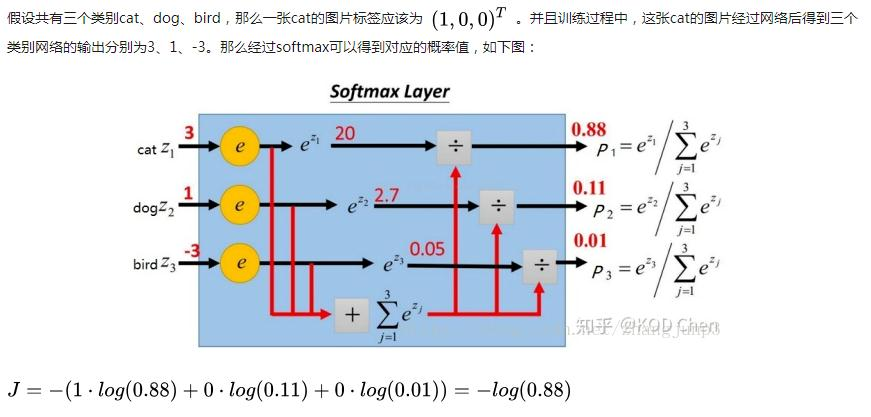

### 神经网络编译模型阶段
```
### TODO: 编译模型
Resnet50_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
```
#### 损失函数的选择
通过计算损失函数的大小，是学习过程中的主要依据也是学习后判断算法优劣的重要判据。  
当神经元输出接近1时候，Sigmoid的导数$ \sigma^{′}(z) $变很小，这样$ \frac{\partial J}{\partial w} $ 、$ \frac{\partial J}{\partial b} $很小，这就导致了ESM均方误差+Sigmoid激活函数使得神经网络反向传播的起始位置——输出层神经元学习率缓慢。想要解决这个问题，需要引入接下来介绍的交叉熵损失函数.

##### 交叉熵损失函数
__结论__：交叉熵损失+Sigmoid激活函数可以解决输出层神经元学习率缓慢的问题，但是不能解决隐藏层神经元学习率缓慢的问题。
交叉熵损失的计算分为两个部分：softmax分类器和交叉熵损失。  
1）交叉熵损失是基于softmax计算来的，$ p_{i}=\frac{e^{Z_{i}}}{\sum_{j=1}^ke^{z_{j}}} $  
softmax将网络最后输出z通过指数转变成概率形式。实际上，softmax是由逻辑斯的回归模型（用于二分类）推广得到的多项逻辑斯蒂回归模型（用于多分类）。
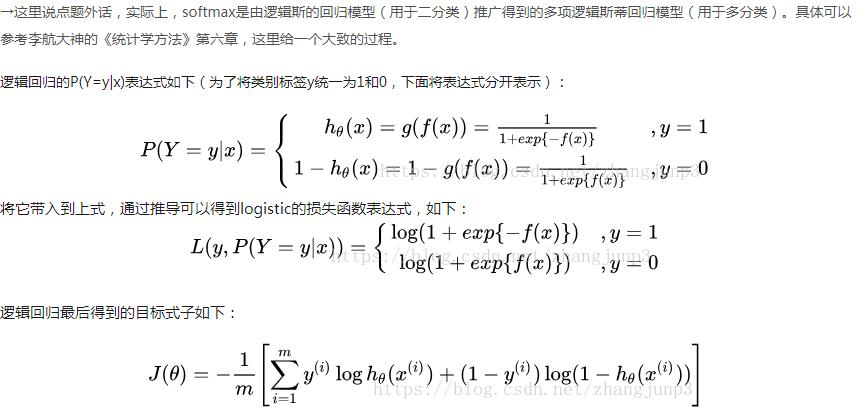
2）交叉熵损失  
公式定义如下：$ J=-\frac{1}{N}\sum_{1}^{N}\sum_{i=1}^{k}y_{i}*log(p_{i}) $  
其中， $y_{i}$ 是类别 i 的真实标签；$p_{i}$是上面softmax计算出的类别 i 的概率值；k是类别数，N是样本总数。

#### 损失函数的类别
损失函数，是网络中的性能函数，也是编译一个模型必须的两个参数之一。由于损失函数种类众多，下面以keras官网手册的为例。
- mean_squared_error或mse 均方误差，也称标准差，反映一个数据集的离散程度。
标准误差定义为各测量值误差的平方和的平均值的平方根，故又称为均方误差。  
公式：$MSE = \frac{1}{n}\sum_{i=1}^{n}(\tilde{Y_{i}}-Y_{i})$


- mean_absolute_error或MAE，平均绝对误差  
平均绝对误差是所有单个观测值与算术平均值的偏差的绝对值的平均。  
$MAE = \frac{1}{n}\sum_{i=1}^{n}\left | f_{i}-y_{i} \right |$  
（fi是预测值，yi是实际值)

- mean_absolute_percentage_error或mape

- mean_squared_logarithmic_error或msle

- squared_hinge

- hinge



- binary_crossentropy（对数损失，log loss），与sigmoid相对应的损失函数。 
常用于二分类问题，当然也可以用于多分类问题，通常需要在网络的最后一层添加sigmoid进行配合使用，其期望输出值（target）需要进行one hot编码，另外BCELoss还可以用于多分类问题Multi-label classification.  
公式：L(Y,P(Y|X)) = -logP(Y|X)  
$loss = -\sum_{i=1}^{n}\hat{y_{i}}logy_{i}+(1-\hat{y_{i}})log(1-\hat{y_{i}})$
$\frac{\partial loss}{\partial y}=-\sum_{i=1}^{n}\frac{\hat{y_{i}}}{y_{i}}-\frac{1-\hat{y_{i}}}{1-y_{i}}$  

这个是针对概率之间的损失函数，你会发现只有$y_{i}$和$\hat{y_{i}}$是相等时，loss才为0，否则loss就是为一个正数。而且，概率相差越大，loss就越大。这个神奇的度量概率距离的方式称为交叉熵。



- categorical_crossentropy：多分类的对数损失，与softmax分类器相对应的损失函数
适用于多分类问题，并使用softmax作为输出层的激活函数的情况.  
使用该目标函数时，需要将标签转化为形如(nb_samples, nb_classes)的二值序列  
tip：此损失函数与上一类同属对数损失函数，sigmoid和softmax的区别主要是，sigmoid用于二分类，softmax用于多分类  


- sparse_categorical_crossentrop：如上，但接受稀疏标签。注意，使用该函数时仍然需要你的标签与输出值的维度相同，你可能需要在标签数据上增加一个维度：np.expand_dims(y,-1)

kullback_leibler_divergence:从预测值概率分布Q到真值概率分布P的信息增益,用以度量两个分布的差异.

cosine_proximity：即预测值与真实标签的余弦距离平均值的相反数

#### 优化器的选择
推荐尝试一下Adam优化器的，时下比较流行，相比于AdaGrad, RMSProp, SGDNesterov 和 AdaDelta来说效率更高～可以参考一下这篇文章：[Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)